# Analysis and plotting the results


In [2]:
# Import the required libraries.
import os
import scipy
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Ping-Pong part


In [3]:
# Read the data for PingPong
PPBD = pd.read_csv('../data/PingPong_different_amr.csv',            # Blocking Ping-Pong on different nodes.
                   header=None, names=['Repetition', 'Size', 'Time'])
PPBS = pd.read_csv('../data/PingPong_same_amr.csv',                 # Blocking Ping-Pong on same nodes.
                   header=None, names=['Repetition', 'Size', 'Time'])
PPND = pd.read_csv('../data/PingPongNonBlocking_different_amr.csv', # Non-blocking Ping-Pong on different nodes.
                   header=None, names=['Repetition', 'Size', 'Time'])
PPNS = pd.read_csv('../data/PingPongNonBlocking_same_amr.csv',      # Non-blocking Ping-Pong on same nodes.
                   header=None, names=['Repetition', 'Size', 'Time'])

In [4]:
# Aggregating all data.
N = len(PPBD['Size'].unique().tolist())     # Number of different message sizes.
Data = {'Size'      : [], 
        'PPBD_mean' : [0 for i in range(N)], 'PPBD_std': [0 for i in range(N)], 
        'PPBS_mean' : [0 for i in range(N)], 'PPBS_std': [0 for i in range(N)], 
        'PPND_mean' : [0 for i in range(N)], 'PPND_std': [0 for i in range(N)], 
        'PPNS_mean' : [0 for i in range(N)], 'PPNS_std': [0 for i in range(N)]}
DFs  = [PPBD, PPBS, PPND, PPNS]
Lbls = ['PPBD', 'PPBS', 'PPND', 'PPNS']
for i in range(len(DFs)):
    data = DFs[i]
    label= Lbls[i]
    Sizes = data['Size'].unique()
    for s in Sizes:             # Iterate over each message size.
        # First find the average and std of the middle 80 values.
        RunTimes = data[data.Size == s]['Time'].to_numpy()
        RunTimes.sort()
        RunTimes = RunTimes[10:-10]             # Filter out the first and last 10 datapoints.
        Mean     = RunTimes.mean()
        Std      = RunTimes.std()
        # Add results to "Data" dictionary.
        if int(s) not in Data['Size']:
            Data['Size'].append(int(s))
        idx = Data['Size'].index(int(s))    # Find the index of the message size.
        Data[f'{label}_mean'][idx] = Mean
        Data[f'{label}_std'][idx]  = Std

# Convert the "Data" into a DataFrame.
Data = pd.DataFrame(Data)
Data

,Size,PPBD_mean,PPBD_std,PPBS_mean,PPBS_std,PPND_mean,PPND_std,PPNS_mean,PPNS_std
0,2,0.000034,8.800629e-07,0.000002,2.610512e-06,0.000038,0.000002,2.228259e-06,1.054052e-07
1,4,0.000034,7.255404e-07,0.000001,1.363920e-06,0.000037,0.000001,9.843962e-07,4.733630e-07
2,8,0.000033,9.281573e-07,0.000001,1.124066e-06,0.000037,0.000002,2.226944e-06,1.159670e-07
3,16,0.000034,7.900878e-07,0.000003,3.722741e-06,0.000038,0.000002,2.654351e-06,2.601874e-06
4,32,0.000036,5.041698e-06,0.000002,2.405770e-06,0.000037,0.000001,2.243241e-06,1.108553e-07
5,64,0.000035,8.049100e-07,0.000004,2.689488e-06,0.000037,0.000002,3.847142e-06,2.143811e-06
6,128,0.000035,7.617790e-07,0.000002,1.973340e-06,0.000042,0.000001,2.143986e-06,2.407096e-06
7,256,0.000037,6.983185e-07,0.000004,2.661722e-06,0.000042,0.000001,1.550466e-06,1.323045e-06
8,512,0.000038,6.084883e-07,0.000002,1.894046e-07,0.000044,0.000002,9.497793e-06,6.227396e-06
9,1024,0.000041,1.055441e-06,0.000005,4.497796e-06,0.000043,0.000001,2.779206e-06,2.281278e-06


In [78]:
# Define a function to fit the linear model.

# Error function.
def error(X, Y, a, b):
    YY = a + b * X
    Error = abs(np.log10(Y) - np.log10(YY)).sum()
    return Error
    
def FitModel(X, Y):
    # First guess using the first 6 value.
    Coeff = np.polyfit(X[:10], Y[:10], 1)
    a = Coeff[1]
    b = Coeff[0]
    # Now use an optimization function to find the best solution.
    ObjFunc = lambda c: error(X, Y, c[0], c[1])
    xopt = scipy.optimize.fmin(func=ObjFunc, x0=[a, b])
    return xopt

In [79]:
# Find the fit model.
a_PPBD, b_PPBD = FitModel(Data['Size'].to_numpy(), Data['PPBD_mean'].to_numpy())
a_PPBS, b_PPBS = FitModel(Data['Size'].to_numpy(), Data['PPBS_mean'].to_numpy())
a_PPND, b_PPND = FitModel(Data['Size'].to_numpy(), Data['PPND_mean'].to_numpy())
a_PPNS, b_PPNS = FitModel(Data['Size'].to_numpy(), Data['PPNS_mean'].to_numpy())

Optimization terminated successfully.
         Current function value: 1.237681
         Iterations: 22
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 2.405308
         Iterations: 36
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 1.691702
         Iterations: 26
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: 2.469621
         Iterations: 41
         Function evaluations: 80


/tmp/ipykernel_119305/3058998440.py:6: RuntimeWarning: invalid value encountered in log10
  Error = abs(np.log10(Y) - np.log10(YY)).sum()


In [80]:
# calculate the latency in microsecond.
Lat_PPBS = a_PPBS * 1e6
Lat_PPBD = a_PPBD * 1e6
Lat_PPNS = a_PPNS * 1e6
Lat_PPND = a_PPND * 1e6
# Calculate the bandwidth in GB/s using the last 8 datapoints.
def CalcBand(X, Y):
    coeff = np.polyfit(np.log10(X * 2), np.log10(Y), 1)
    return 1 / coeff[0]

Band_PPBS = CalcBand(Data['Size'].to_numpy()[-8:], Data['PPBS_mean'].to_numpy()[-8:])
Band_PPBD = CalcBand(Data['Size'].to_numpy()[-8:], Data['PPBD_mean'].to_numpy()[-8:])
Band_PPNS = CalcBand(Data['Size'].to_numpy()[-8:], Data['PPNS_mean'].to_numpy()[-8:])
Band_PPND = CalcBand(Data['Size'].to_numpy()[-8:], Data['PPND_mean'].to_numpy()[-8:])

In [81]:
Band_PPBS, Band_PPBD, Band_PPNS, Band_PPND

(0.9905599251706737,
 1.0398787901244635,
 0.9929259206433835,
 1.0431884294038585)

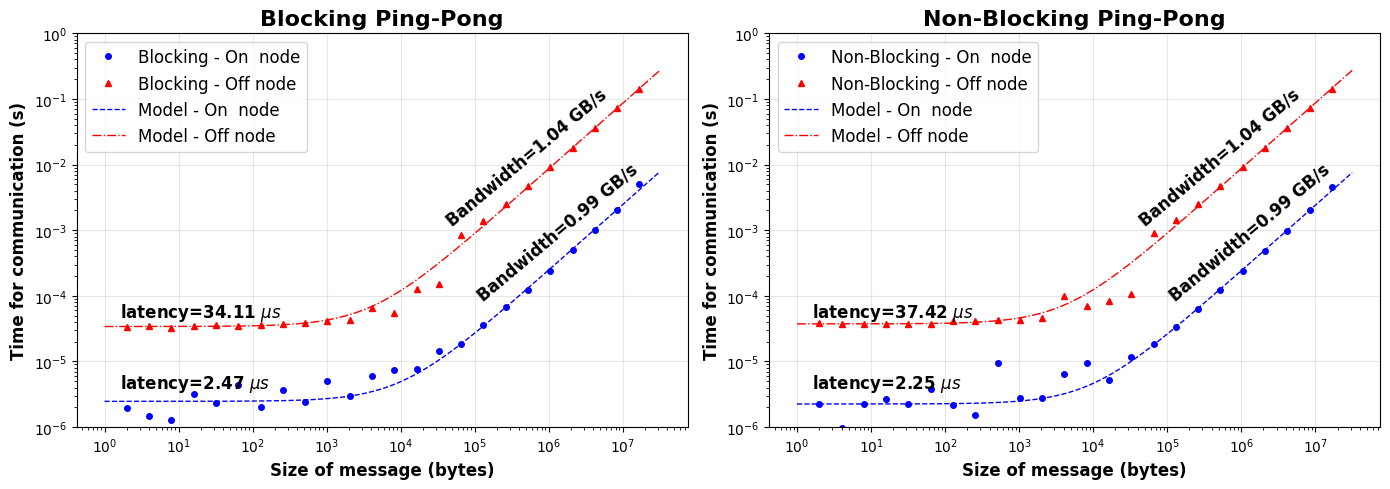

In [82]:
# First plotting for the Blocking and Non-Blocking cases.
SS = np.logspace(0, 7.5, 300)


fig, ax = plt.subplots(1, 2, figsize=(14, 5))
# First blocking ping pong
ax[0].loglog(Data['Size'], Data['PPBS_mean'], ls='', marker='o', markersize=4, color='b', label='Blocking - On  node')
ax[0].loglog(Data['Size'], Data['PPBD_mean'], ls='', marker='^', markersize=4, color='r', label='Blocking - Off node')
ax[0].loglog(SS, a_PPBS + b_PPBS * SS, ls='--', lw=1, color='b', label='Model - On  node')
ax[0].loglog(SS, a_PPBD + b_PPBD * SS, ls='-.', lw=1, color='r', label='Model - Off node')
ax[0].text(0.07, 0.14, f'latency={Lat_PPBS:.2f} $\mu s$', fontsize=12, fontweight='bold', color='k', 
             verticalalignment='top', horizontalalignment='left', transform=ax[0].transAxes)
ax[0].text(0.07, 0.32, f'latency={Lat_PPBD:.2f} $\mu s$', fontsize=12, fontweight='bold', color='k', 
             verticalalignment='top', horizontalalignment='left', transform=ax[0].transAxes)
ax[0].text(0.65, 0.68, f'Bandwidth={Band_PPBS:.2f} GB/s', fontsize=12, fontweight='bold', color='k', 
             verticalalignment='top', horizontalalignment='left', transform=ax[0].transAxes, rotation=40)
ax[0].text(0.60, 0.87, f'Bandwidth={Band_PPBD:.2f} GB/s', fontsize=12, fontweight='bold', color='k', 
             verticalalignment='top', horizontalalignment='left', transform=ax[0].transAxes, rotation=40)
ax[0].set_title('Blocking Ping-Pong', fontsize=16, fontweight='bold', color='k')
ax[0].set_ylabel('Time for communication (s)', fontsize=12, fontweight='bold', color='k')
ax[0].set_xlabel('Size of message (bytes)', fontsize=12, fontweight='bold', color='k')
ax[0].legend(fontsize=12, fancybox=True)
ax[0].grid('on', alpha=0.3)
ax[0].set_ylim([1e-6, 1e0])
# Now, non-blocking ping pong
ax[1].loglog(Data['Size'], Data['PPNS_mean'], ls='', marker='o', markersize=4, color='b', label='Non-Blocking - On  node')
ax[1].loglog(Data['Size'], Data['PPND_mean'], ls='', marker='^', markersize=4, color='r', label='Non-Blocking - Off node')
ax[1].loglog(SS, a_PPNS + b_PPNS * SS, ls='--', lw=1, color='b', label='Model - On  node')
ax[1].loglog(SS, a_PPND + b_PPND * SS, ls='-.', lw=1, color='r', label='Model - Off node')
ax[1].text(0.07, 0.14, f'latency={Lat_PPNS:.2f} $\mu s$', fontsize=12, fontweight='bold', color='k', 
             verticalalignment='top', horizontalalignment='left', transform=ax[1].transAxes)
ax[1].text(0.07, 0.32, f'latency={Lat_PPND:.2f} $\mu s$', fontsize=12, fontweight='bold', color='k', 
          verticalalignment='top', horizontalalignment='left', transform=ax[1].transAxes)
ax[1].text(0.65, 0.68, f'Bandwidth={Band_PPNS:.2f} GB/s', fontsize=12, fontweight='bold', color='k', 
             verticalalignment='top', horizontalalignment='left', transform=ax[1].transAxes, rotation=40)
ax[1].text(0.60, 0.87, f'Bandwidth={Band_PPND:.2f} GB/s', fontsize=12, fontweight='bold', color='k', 
             verticalalignment='top', horizontalalignment='left', transform=ax[1].transAxes, rotation=40)
ax[1].set_title('Non-Blocking Ping-Pong', fontsize=16, fontweight='bold', color='k')
ax[1].set_ylabel('Time for communication (s)', fontsize=12, fontweight='bold', color='k')
ax[1].set_xlabel('Size of message (bytes)', fontsize=12, fontweight='bold', color='k')
ax[1].legend(fontsize=12, fancybox=True)
ax[1].grid('on', alpha=0.3)
ax[1].set_ylim([1e-6, 1e0])

fig.tight_layout()
fig.savefig('Fig01_PingPong.png', format='png', dpi=800)

____
## Ring Shift Part

In [17]:
# Find the result files.
FileList, FileList2 = [], []
for fname in os.listdir('../data'):
    if fname.startswith('Ring_n') and fnmatch.fnmatch(fname, '*.csv') and 'old' not in fname:
        FileList.append(os.path.join('../data/', fname))
for fname in os.listdir('../data'):
    if fname.startswith('Ring_Non') and fnmatch.fnmatch(fname, '*.csv'):
        FileList2.append(os.path.join('../data/', fname))
print(f'There are {len(FileList)} files to process. [Blocking]')
print(f'There are {len(FileList2)} files to process. [NonBlocking]')

There are 29 files to process. [Blocking]
There are 29 files to process. [NonBlocking]


In [18]:
# Create an initial dataframe.
CSV     = pd.read_csv(FileList[0], header=None, names=['Repetition', 'Size', 'NumTasks', 'Time'])
Sizes   = list(CSV.Size.unique())
Data1   = pd.DataFrame({'Size': Sizes})
Data1.set_index('Size', inplace=True)
Comb1   = []

# Iterate over each file.
for fname in FileList:
    # Find the configuration of the run.
    Nnode = int(fname.lower().split('_n')[1].split('_')[0])
    Ntask = int(fname.lower().split('_t')[1].split('.')[0])
    # Read the file. 
    CSV = pd.read_csv(fname, header=None, names=['Repetition', 'Size', 'NumTasks', 'Time'])
    # Extract data for each message size.
    ColName = f'B_N{Nnode}_T{Ntask}'
    Comb1.append(ColName)
    Data1[f'{ColName}']     = 0
    Data1[f'{ColName}_std'] = 0
    for s in Sizes:
        # First find the average and std of the middle 80 values.
        RunTimes = CSV[CSV.Size == s]['Time'].to_numpy()
        RunTimes.sort()
        Start = int(len(RunTimes) / 10)
        End   = int(len(RunTimes) * 9 / 10)
        RunTimes = RunTimes[Start:End]             # Filter out the first and last 10% datapoints.
        if len(RunTimes) == 0:
            print(Nnode, Ntask, s)
        Mean     = RunTimes.mean()
        Std      = RunTimes.std()
        # Add the result to Data.
        Data1.loc[s, ColName]          = Mean
        Data1.loc[s, f'{ColName}_std'] = Std

Data1.head()

4 64 2048


/tmp/ipykernel_30774/120437339.py:29: RuntimeWarning: Mean of empty slice.
  Mean     = RunTimes.mean()
/mnt/home/abdolla4/anaconda3/envs/updaps/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/mnt/home/abdolla4/anaconda3/envs/updaps/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/mnt/home/abdolla4/anaconda3/envs/updaps/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/mnt/home/abdolla4/anaconda3/envs/updaps/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


2 128 1048576
2 128 2097152
2 128 4194304
2 128 8388608
2 128 16777216


/tmp/ipykernel_30774/120437339.py:29: RuntimeWarning: Mean of empty slice.
  Mean     = RunTimes.mean()
/mnt/home/abdolla4/anaconda3/envs/updaps/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/mnt/home/abdolla4/anaconda3/envs/updaps/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/mnt/home/abdolla4/anaconda3/envs/updaps/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/mnt/home/abdolla4/anaconda3/envs/updaps/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,B_N8_T128,B_N8_T128_std,B_N1_T4,B_N1_T4_std,B_N8_T16,B_N8_T16_std,B_N2_T2,B_N2_T2_std,B_N2_T4,B_N2_T4_std,...,B_N2_T128,B_N2_T128_std,B_N2_T16,B_N2_T16_std,B_N1_T128,B_N1_T128_std,B_N1_T32,B_N1_T32_std,B_N16_T64,B_N16_T64_std
Size,,,,,,,,,,,,,,,,,,,,,
2,0.002122,0.000384,0.000075,0.000005,0.000145,0.000013,0.000084,0.000015,0.000111,0.000017,...,0.002058,0.001258,0.000145,0.000019,0.000441,0.000154,0.000141,0.000027,0.000126,0.000007
4,0.000230,0.000157,0.000076,0.000005,0.003889,0.007837,0.000081,0.000013,0.000094,0.000018,...,0.000267,0.000221,0.000122,0.000013,0.000305,0.000198,0.000201,0.000199,0.000126,0.000005
8,0.001694,0.000177,0.000076,0.000004,0.000148,0.000034,0.000078,0.000011,0.000096,0.000014,...,0.000191,0.000109,0.000130,0.000030,0.000770,0.000291,0.000140,0.000075,0.000228,0.000193
16,0.000236,0.000099,0.000077,0.000004,0.000137,0.000042,0.000080,0.000012,0.000096,0.000014,...,0.001289,0.000343,0.000130,0.000022,0.000429,0.000067,0.000372,0.000587,0.000129,0.000007
32,0.002388,0.000185,0.000076,0.000005,0.000133,0.000027,0.000087,0.000015,0.000100,0.000017,...,0.000593,0.000412,0.000144,0.000019,0.000658,0.000576,0.001110,0.001096,0.000141,0.000041


In [19]:
# Create an initial dataframe.
CSV     = pd.read_csv(FileList2[0], header=None, names=['Repetition', 'Size', 'NumTasks', 'Time'])
Sizes   = list(CSV.Size.unique())
Data2   = pd.DataFrame({'Size': Sizes})
Data2.set_index('Size', inplace=True)
Comb2   = []

# Iterate over each file.
for fname in FileList2:
    # Find the configuration of the run.
    Nnode = int(fname.lower().split('k_n')[1].split('_')[0])
    Ntask = int(fname.lower().split('_t')[1].split('.')[0])
    # Read the file. 
    CSV = pd.read_csv(fname, header=None, names=['Repetition', 'Size', 'NumTasks', 'Time'])
    # Extract data for each message size.
    ColName = f'N_N{Nnode}_T{Ntask}'
    Comb2.append(ColName)
    Data2[f'{ColName}']     = 0
    # Data2[f'{ColName}_std'] = 0
    for s in Sizes:
        # First find the average and std of the middle 80 values.
        RunTimes = CSV[CSV.Size == s]['Time'].to_numpy()
        RunTimes.sort()
        Start = int(len(RunTimes) / 10)
        End   = int(len(RunTimes) * 9 / 10)
        RunTimes = RunTimes[Start:End]             # Filter out the first and last 10% datapoints.
        Mean     = RunTimes.mean()
        Std      = RunTimes.std()
        # Add the result to Data.
        Data2.loc[s, ColName]          = Mean
        # Data2.loc[s, f'{ColName}_std'] = Std

Data2

,N_N4_T16,N_N4_T64,N_N2_T128,N_N4_T4,N_N16_T32,N_N8_T128,N_N8_T8,N_N2_T2,N_N2_T8,N_N2_T64,...,N_N1_T2,N_N1_T64,N_N8_T16,N_N1_T4,N_N8_T32,N_N4_T128,N_N1_T32,N_N2_T16,N_N16_T128,N_N1_T16
Size,,,,,,,,,,,,,,,,,,,,,
2,0.000225,0.000121,0.000575,0.000182,0.000161,0.003123,0.000123,0.000096,0.000125,0.000762,...,0.000067,0.007447,0.000115,0.000114,0.000137,0.003164,0.000271,0.000127,0.027478,0.000249
4,0.000210,0.003467,0.001028,0.000202,0.000193,0.000124,0.000131,0.000097,0.000146,0.001324,...,0.000079,0.011544,0.000129,0.000133,0.000120,0.005238,0.000476,0.000155,0.013041,0.000170
8,0.000182,0.003833,0.000679,0.000305,0.000162,0.000204,0.000125,0.000121,0.000114,0.000167,...,0.000073,0.006163,0.000129,0.000106,0.000142,0.005493,0.000985,0.000125,0.008553,0.000138
16,0.000268,0.004859,0.000337,0.000169,0.000257,0.004079,0.000123,0.000092,0.000142,0.000129,...,0.000076,0.004566,0.000129,0.000115,0.000137,0.005179,0.000544,0.000157,0.027020,0.000136
32,0.000187,0.000231,0.000450,0.000349,0.000154,0.000123,0.000120,0.000095,0.000114,0.000175,...,0.000074,0.006567,0.000117,0.000120,0.000130,0.004978,0.001017,0.000124,0.010431,0.000119
64,0.000457,0.000268,0.000278,0.000154,0.000168,0.002214,0.000134,0.000095,0.000145,0.002882,...,0.000066,0.006324,0.000126,0.000105,0.000138,0.005063,0.000496,0.000157,0.024234,0.000118
128,0.000253,0.000232,0.000381,0.000204,0.000185,0.000274,0.000120,0.000094,0.000113,0.000217,...,0.000078,0.002379,0.000115,0.000140,0.000129,0.007130,0.000233,0.000116,0.009349,0.000129
256,0.000211,0.002431,0.000545,0.000204,0.000172,0.000164,0.000127,0.000075,0.000159,0.001341,...,0.000073,0.001204,0.000121,0.000110,0.000134,0.001579,0.000704,0.000136,0.024368,0.000137
512,0.000359,0.000130,0.000649,0.000176,0.000278,0.000175,0.000136,0.000108,0.000141,0.001387,...,0.000076,0.000823,0.000134,0.000106,0.000127,0.005959,0.000559,0.000125,0.028060,0.000135


In [20]:
# Sort the Comb.
Nnode = np.array([int(Comb1[i].split('_N')[1].split('_')[0]) for i in range(len(Comb1))])
Ntask = np.array([int(Comb1[i].split('_T')[1]) for i in range(len(Comb1))])
NN    = Nnode + Ntask / 1e3
Indx  = np.argsort(NN)
Comb1 = list(np.array(Comb1)[Indx])

Nnode = np.array([int(Comb2[i].split('_N')[1].split('_')[0]) for i in range(len(Comb2))])
Ntask = np.array([int(Comb2[i].split('_T')[1]) for i in range(len(Comb2))])
NN    = Nnode + Ntask / 1e3
Indx  = np.argsort(NN)
Comb2 = list(np.array(Comb2)[Indx])

In [21]:
# Define a function to fit the linear model.

# Error function.
def error(X, Y, a, b):
    YY = a + b * X
    Error = abs(np.log10(Y) - np.log10(YY)).sum()
    return Error
    
def FitModel(X, Y):
    # First guess using the first 6 value.
    Coeff = np.polyfit(X[:10], Y[:10], 1)
    a = Coeff[1]
    b = Coeff[0]
    # Now use an optimization function to find the best solution.
    ObjFunc = lambda c: error(X, Y, c[0], c[1])
    xopt = scipy.optimize.fmin(func=ObjFunc, x0=[a, b])
    return xopt

# Calculate the bandwidth in GB/s using the last 8 datapoints.
def CalcBand(X, Y):
    coeff = np.polyfit(np.log10(X), np.log10(Y), 1)
    return 1 / coeff[0]

In [30]:
# Manually remove the outliers from Nnode=4, Ntasks=8 in blocking data.
MoveAvg = []
for s in Data1.index:
    if s < 1e5 and Data1.loc[s, 'B_N4_T8'] > 1e-3:
        Data1.loc[s, 'B_N4_T8'] = sum(MoveAvg) / len(MoveAvg)
    MoveAvg.append(Data1.loc[s, 'B_N4_T8'])

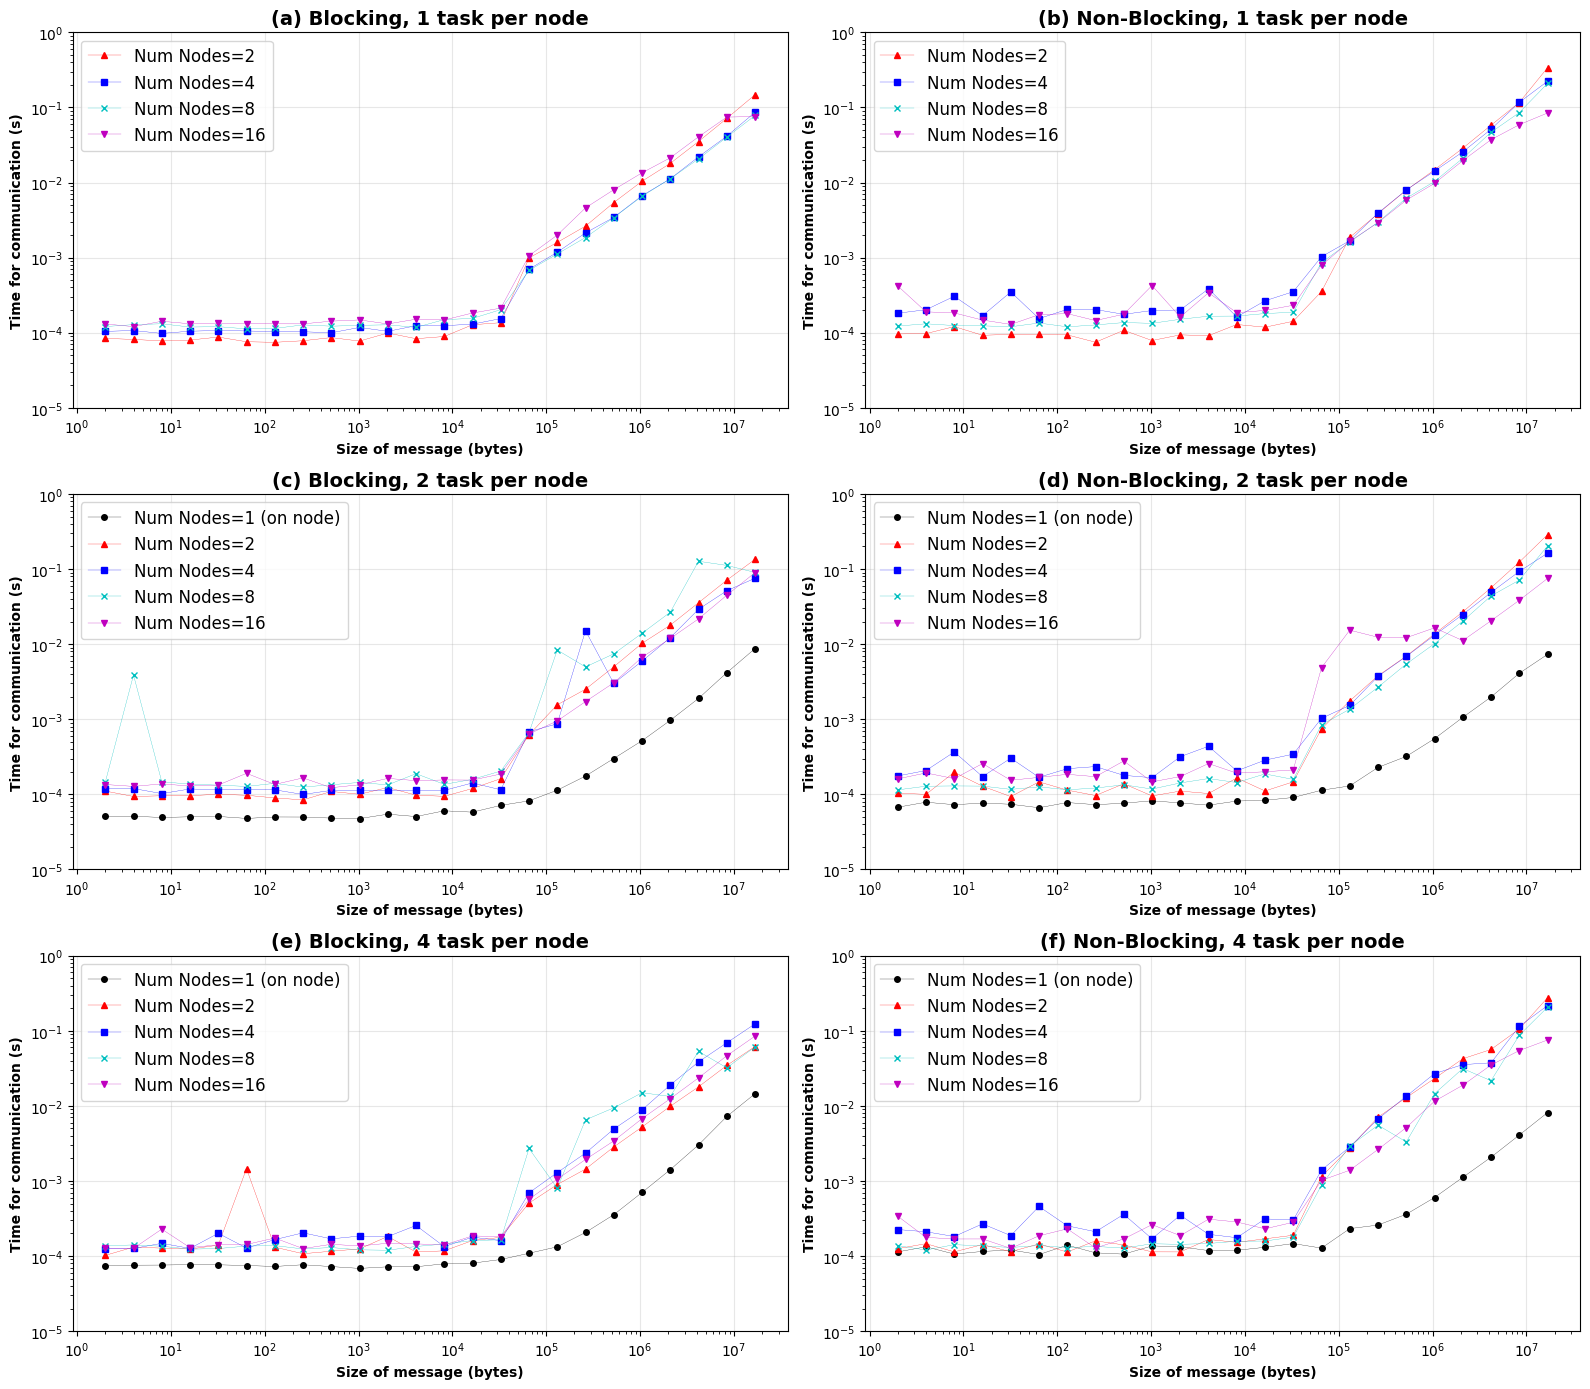

In [32]:
# First plot the results for ringshift where each node has one task.
Colors  = ['k', 'r', 'b', 'c', 'm', 'g']
Markers = ['o', '^', 's', 'x', 'v', '*']
MS      = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]



fig, axs = plt.subplots(3, 2, figsize=(16, 14))

for tt in ['Block', 'NonBlock']:        # Different types: blocking and NonBlocking.
    for tn in [1, 2, 4]:                # Different Ntask/Nnode ratios.
        # Define the count for plot properties.
        if tn == 1:
            count = 1
        else:
            count = 0
        # Define the axis.
        if tt == 'Block':
            if tn == 1:
                ax = axs[0, 0]
                Title = '(a) Blocking, 1 task per node'
            elif tn == 2:
                ax = axs[1, 0]
                Title = '(c) Blocking, 2 task per node'
            elif tn == 4:
                ax = axs[2, 0]
                Title = '(e) Blocking, 4 task per node'
        else:
            if tn == 1:
                ax = axs[0, 1]
                Title = '(b) Non-Blocking, 1 task per node'
            elif tn == 2:
                ax = axs[1, 1]
                Title = '(d) Non-Blocking, 2 task per node'
            elif tn == 4:
                ax = axs[2, 1]
                Title = '(f) Non-Blocking, 4 task per node'
        # Define the Data and Combinations.
        if tt == 'Block':
            Data = Data1
            Comb = Comb1
        else:
            Data = Data2
            Comb = Comb2
        # Do the plotting.
        for col in Comb:
            # Extract data.
            Ntask = int(col.split('_T')[1])
            Nnode = int(col.split('_N')[1].split('_')[0])
            X = np.array(Data.index)
            Y = Data[col].to_numpy()
            # Select only node per task == 1.
            if Nnode * tn != Ntask:
                continue
            if Nnode == 1:
                ax.loglog(X, Y, ls='-', lw=0.2, marker=Markers[count], markersize=MS[count], 
                          color=Colors[count], label=f'Num Nodes={Nnode} (on node)')
            else:
                ax.loglog(X, Y, ls='-', lw=0.2, marker=Markers[count], markersize=MS[count],  
                          color=Colors[count], label=f'Num Nodes={Nnode}')
            count += 1
        ax.set_title(Title, fontsize=14, fontweight='bold', color='k')
        ax.set_ylabel('Time for communication (s)', fontsize=10, fontweight='bold', color='k')
        ax.set_xlabel('Size of message (bytes)', fontsize=10, fontweight='bold', color='k')
        ax.legend(fontsize=12, fancybox=True)
        ax.grid('on', alpha=0.3)
        ax.set_ylim([1e-5, 1e0])
        

fig.tight_layout()
fig.savefig('Fig03_RingShift.png', format='png', dpi=800)

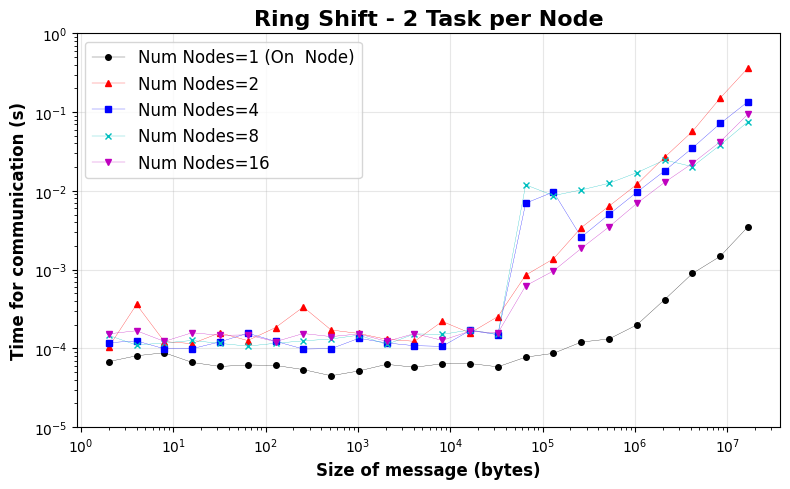

In [146]:
# First plot the results for ringshift where each node has one task.
Colors  = ['k', 'r', 'b', 'c', 'm', 'g']
Markers = ['o', '^', 's', 'x', 'v', '*']
MS      = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]



fig = plt.figure(figsize=(8, 5))

count = 0
for col in Comb:
    # Extract data.
    Nnode = int(col.split('_N')[1].split('_')[0])
    Ntask = int(col.split('_T')[1])
    X = np.array(Data.index)
    Y = Data[col].to_numpy()
    # Select only node per task == 1.
    if Nnode * 2 != Ntask:
        continue
    if Nnode == 1:
        plt.loglog(X, Y, ls='-', lw=0.2, marker=Markers[count], markersize=MS[count], 
                color=Colors[count], label=f'Num Nodes={Nnode} (On  Node)')
    else:
        plt.loglog(X, Y, ls='-', lw=0.2, marker=Markers[count], markersize=MS[count], 
                color=Colors[count], label=f'Num Nodes={Nnode}')
    count += 1
plt.title('Ring Shift - 2 Task per Node', fontsize=16, fontweight='bold', color='k')
plt.ylabel('Time for communication (s)', fontsize=12, fontweight='bold', color='k')
plt.xlabel('Size of message (bytes)', fontsize=12, fontweight='bold', color='k')
plt.legend(fontsize=12, fancybox=True)
plt.grid('on', alpha=0.3)
plt.gca().set_ylim([1e-5, 1e0])

fig.tight_layout()
fig.savefig('Fig02_TaskNode=2.png', format='png', dpi=800)

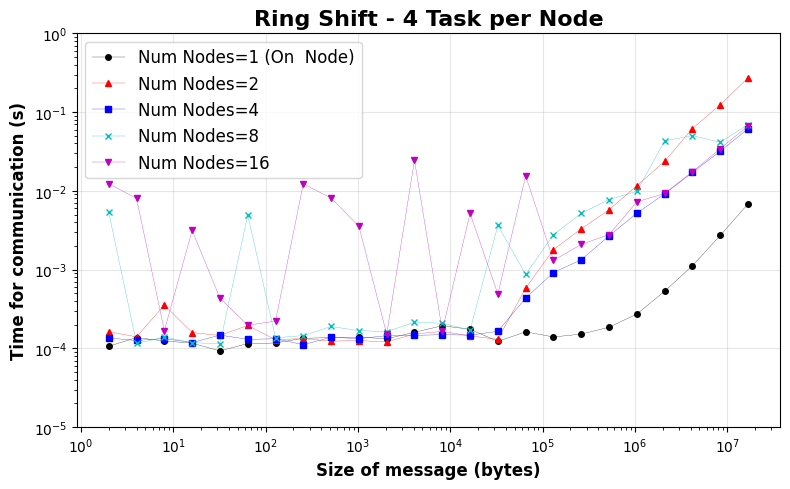

In [145]:
# First plot the results for ringshift where each node has one task.
Colors  = ['k', 'r', 'b', 'c', 'm', 'g']
Markers = ['o', '^', 's', 'x', 'v', '*']
MS      = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]



fig = plt.figure(figsize=(8, 5))

count = 0
for col in Comb:
    # Extract data.
    Nnode = int(col.split('_N')[1].split('_')[0])
    Ntask = int(col.split('_T')[1])
    X = np.array(Data.index)
    Y = Data[col].to_numpy()
    # Select only node per task == 1.
    if Nnode * 4 != Ntask:
        continue
    if Nnode == 1:
        plt.loglog(X, Y, ls='-', lw=0.2, marker=Markers[count], markersize=MS[count], 
                color=Colors[count], label=f'Num Nodes={Nnode} (On  Node)')
    else:
        plt.loglog(X, Y, ls='-', lw=0.2, marker=Markers[count], markersize=MS[count], 
                color=Colors[count], label=f'Num Nodes={Nnode}')
    count += 1
plt.title('Ring Shift - 4 Task per Node', fontsize=16, fontweight='bold', color='k')
plt.ylabel('Time for communication (s)', fontsize=12, fontweight='bold', color='k')
plt.xlabel('Size of message (bytes)', fontsize=12, fontweight='bold', color='k')
plt.legend(fontsize=12, fancybox=True)
plt.grid('on', alpha=0.3)
plt.gca().set_ylim([1e-5, 1e0])

fig.tight_layout()
fig.savefig('Fig02_TaskNode=4.png', format='png', dpi=800)